In [1]:
import numpy
from matplotlib import pyplot

%matplotlib inline

In [2]:
L = 0.01
nx, ny = 21, 21
dx = L / (nx - 1)
dy = L / (ny - 1)

x = numpy.linspace(0.0, L, num=nx)
y = numpy.linspace(0.0, L, num=ny)

alpha = 1e-4

# initial conditions
T0 = numpy.full((ny, nx), 20.0)
T0[0, :] = 100.0  # bottom boundary
T0[:, 0] = 100.0  # left boundary

In [3]:
def ftcs(T0, nt, dt, dx, dy, alpha, qx=0.0, qy=0.0):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dx**2
    ny, nx = T.shape
    I, J = nx // 2, ny // 2
    for n in range(nt):
        T[1: -1, 1: -1] = (T[1: -1, 1: -1] +
                           sigma_x * (T[1: -1, :-2] - 2 * T[1: -1, 1: -1] + T[1: -1, 2:]) +
                           sigma_y * (T[:-2, 1: -1] - 2 * T[1: -1, 1: -1] + T[2:, 1: -1]))
        # update boundary values (Neumann conditionn)
        T[:, -1] = T[:, -2] + qx * dx # right boundary
        T[-1, :] = T[-2, :] + qy * dy # bottom boundary
        if T[J, I] >= 70.0:
            break # get out the for loop
            
    print(n + 1, T[J, I])
    
    return T

In [10]:
nt = 500
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha # mor concentrating and numeric scheme stable

T = ftcs(T0, nt, dt, dx, dy, alpha)

256 70.02138294076661


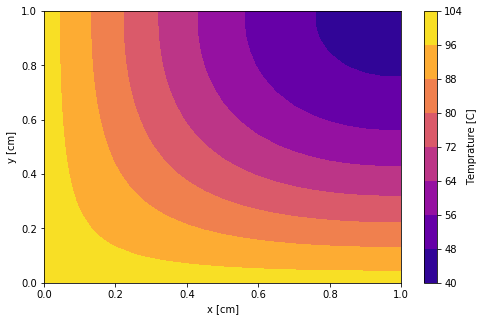

In [11]:
pyplot.figure(figsize=(8.0, 5.0))
pyplot.xlabel('x [cm]')
pyplot.ylabel('y [cm]')
contf = pyplot.contourf(x * 100, y * 100, T, cmap='plasma');
cbar = pyplot.colorbar(contf)
cbar.set_label('Temprature [C]')